### What is this about?

**Key Concepts**

-> What is a the central limit theorem?

-> How does it apply to (any) distribution?

-> Where does it apply in the real world/what usage can be made?


All this in the following code cells ...

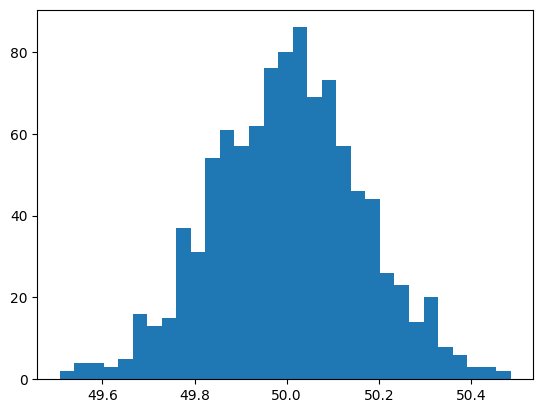

In [157]:
# Binominal

import numpy as np
import matplotlib.pyplot as plt

n, p, m, l = 100, 0.5, 1000, 1000

draw = np.random.binomial(n, p, (m, l))
randomvar = np.mean(draw, axis=1)
plt.hist(randomvar, bins=max(10, int(np.sqrt(m))));

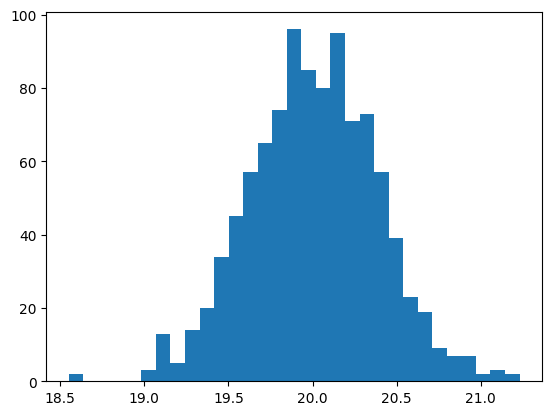

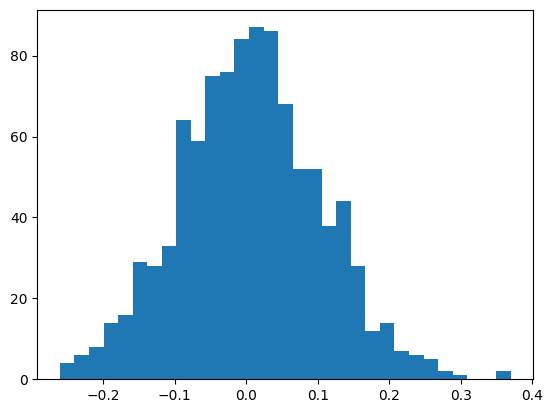

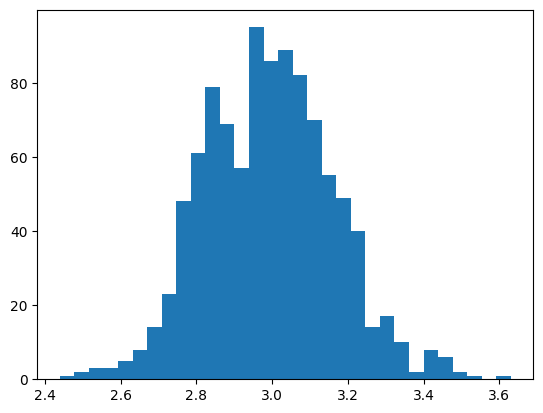

In [166]:
import numpy as np
import matplotlib.pyplot as plt


def draw_calc_mean(nrandomvar, dist, **kwargs):
    draw = dist(size=nrandomvar, **kwargs)
    randomvars = np.mean(draw, axis=1)
    plt.hist(randomvars, bins=max(10, int(np.sqrt(nrandomvar[0]))))
    plt.show()


# Example usage:
# 0: number of sequences, 1: values per sequence (mean)
size = (1000, 100)
# Binomial distribution
draw_calc_mean(size, np.random.binomial, n=100, p=0.2)

# Normal distribution
draw_calc_mean(size, np.random.normal, loc=0, scale=1)

# Poisson distribution
draw_calc_mean(size, np.random.poisson, lam=3)

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntSlider
from IPython.display import display

    
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive, IntSlider
from IPython.display import display


def draw_calc_mean(nrandomvar, func, sample_size=30, **kwargs):
    plt.figure(figsize=(10, 6))
    # Generate nrandomvar samples, each of size sample_size
    draw = func(size=(nrandomvar, sample_size), **kwargs)
    # Calculate mean for each sample
    randomvars = np.mean(draw, axis=1)
    plt.hist(randomvars, bins=max(10, nrandomvar//100), edgecolor='black')
    plt.title(
        f'Mean of {func.__name__} Distribution\n{nrandomvar} samples, each of size {sample_size}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()


def interactive_dist(dist, min_samples=10, max_samples=1000, **kwargs):
    def update(nrandomvar):
        draw_calc_mean(nrandomvar, dist, **kwargs)

    slider = IntSlider(min=min_samples, max=max_samples,
                       step=10, value=min_samples)
    return interactive(update, nrandomvar=slider)


# Example usage:
# Binomial distribution
binomial_widget = interactive_dist(np.random.binomial, n=100, p=0.2)
display(binomial_widget)

# Normal distribution
normal_widget = interactive_dist(np.random.normal, loc=0, scale=1)
display(normal_widget)

# Poisson distribution
poisson_widget = interactive_dist(np.random.poisson, lam=3)
display(poisson_widget)

interactive(children=(IntSlider(value=10, description='nrandomvar', max=1000, min=10, step=10), Output()), _do…

interactive(children=(IntSlider(value=10, description='nrandomvar', max=1000, min=10, step=10), Output()), _do…

interactive(children=(IntSlider(value=10, description='nrandomvar', max=1000, min=10, step=10), Output()), _do…